<a href="https://colab.research.google.com/github/ameyadalvi84/CIFAR10/blob/master/CIFAR10_with_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras as K
from keras import models, layers
from keras.utils import to_categorical
from keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

%matplotlib inline

In [16]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
print("Shape of train_images : ", train_images.shape)
print("Max value in train_images : ", train_images.max())
print("Min value in train_images : ", train_images.min())

Shape of train_images :  (50000, 32, 32, 3)
Max value in train_images :  255
Min value in train_images :  0


In [0]:
train_images = train_images.astype('float32') / 255.
train_labels_cat = to_categorical(train_labels)
test_images = test_images.astype('float32') / 255.
test_labels_cat = to_categorical(test_labels)

In [0]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (32,32,3))

In [0]:
#conv_base.summary()
conv_base.trainable = False

In [0]:
def build_model():
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256,activation='relu'))
  model.add(layers.Dense(10,activation='sigmoid'))
  return model

In [22]:
#val_images = train_images[:5000]
#val_labels = train_labels_cat[:5000]
#partial_train_images = train_images[5000:]
#partial_train_labels = train_labels_cat[5000:]
model1 = build_model()
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(train_images,
                     train_labels_cat,
                     batch_size=64,
                     epochs=50)
           #validation_data=(val_images, val_labels))

Epoch 1/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.3766 - accuracy: 0.5207
Epoch 2/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.1872 - accuracy: 0.5846
Epoch 3/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.1332 - accuracy: 0.6050
Epoch 4/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.0922 - accuracy: 0.6180
Epoch 5/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.0537 - accuracy: 0.6314
Epoch 6/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.0201 - accuracy: 0.6425
Epoch 7/50
50000/50000 [==============================] - 21s 412us/step - loss: 0.9908 - accuracy: 0.6532
Epoch 8/50
50000/50000 [==============================] - 21s 416us/step - loss: 0.9624 - accuracy: 0.6638
Epoch 9/50
50000/50000 [==============================] - 21s 411us/step - loss: 0.9366 - accuracy: 0.6715
Epoch 10/50
50000/50000 [============

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

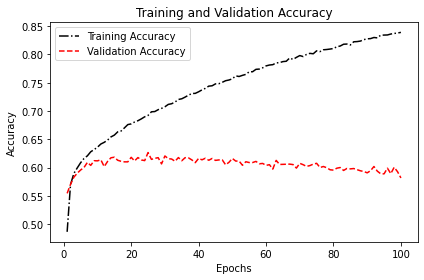

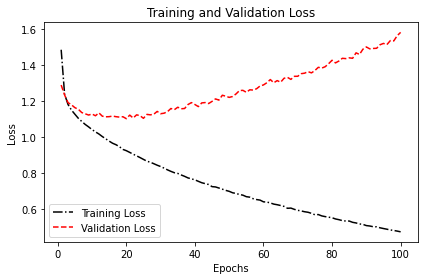

In [9]:
val_loss = history_dict['val_loss']
train_loss = history_dict['loss']
val_acc = history_dict['val_accuracy']
train_acc = history_dict['accuracy']

epoch_num = range(1,len(val_acc)+1)

plt.plot(epoch_num,train_acc,'k-.',label="Training Accuracy")
plt.plot(epoch_num,val_acc,'r--',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()

plt.figure()

plt.plot(epoch_num,train_loss,'k-.',label="Training Loss")
plt.plot(epoch_num,val_loss,'r--',label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()

In [23]:
result = model1.evaluate(test_images,test_labels_cat)

10000/10000 [==============================] - 6s 554us/step


In [24]:
result

[1.724895093536377, 0.5925999879837036]

VGG16 did not help. Overfitting is very much evident


> Need to try data augmentation


> Drop out and Batchnormalization


> Need to reach accuracy of 80% on Test set.





